In [ ]:
pip install plotnine

In [ ]:
pip install ggplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.9 MB/s eta 0:00:00


In [ ]:
pip install plotly

In [ ]:
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as pyplot
from matplotlib import font_manager as fmgr
from pandas.plotting import autocorrelation_plot
import plotnine
from plotnine import ggplot,geom_line,aes

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

from datetime import datetime,timedelta

In [ ]:
work_years = [1,2,3,4,5]
income = [6500,12900,10000,13200,47000]

df = pd.DataFrame({'Years at work': work_years,'Income': income})

In [ ]:
df.head()

,Years at work,Income
0,1,6500
1,2,12900
2,3,10000
3,4,13200
4,5,47000


In [ ]:
l_p= ggplot(data=df,mapping=aes(x='Years at work',y='Income'))

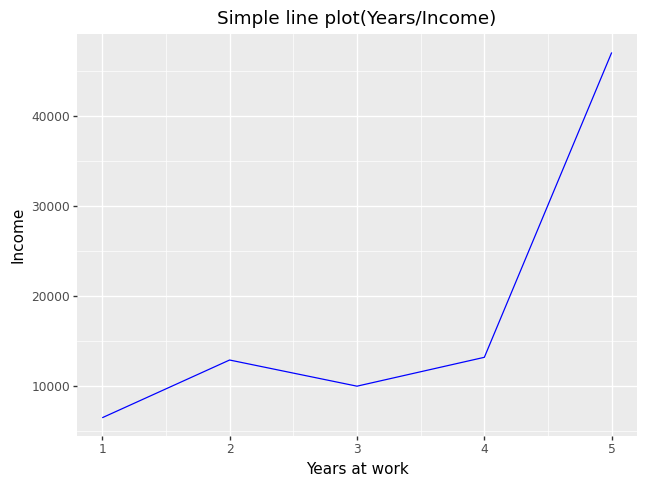

In [ ]:
(l_p + plotnine.geom_line(color="blue") + plotnine.labs(title="Simple line plot(Years/Income)")).draw()

In [ ]:
work_years = [1,2,3,4]
ml_engineers_income = [10000,12000,14000,16000]
sde_income = [8000,11000,10000,17000]

income_df = pd.DataFrame({"Years at Work": work_years, "ML Engineer Income": ml_engineers_income, "SDE": sde_income})

In [ ]:
income_df.head()

,Years at Work,ML Engineer Income,SDE
0,1,10000,8000
1,2,12000,11000
2,3,14000,10000
3,4,16000,17000


In [59]:
(ggplot()+
 plotnine.geom_line(data=income_df,mapping=aes(x='Years at Work', y='ML Engineer Income', color='blue'))+
 plotnine.geom_line(data=income_df,mapping=aes(x='Years at Work', y='SDE', color='red'))+
 plotnine.labs(title="Multiline Plot from ML and SDE Engineer Income/Years")+
 plotnine.scale_color_identity(guide='legend', name="legend", breaks=['blue','red'], labels=['ML Engineers Income','SDE Income'])).draw()

Figure(640x480)


In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


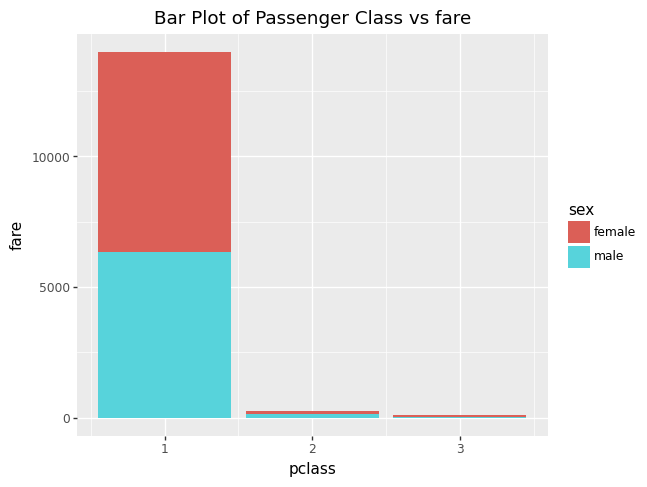

In [53]:
(plotnine.ggplot(data=df.dropna(),mapping = aes(x='pclass',y='fare',fill='sex'))+
 plotnine.geom_col()+
 plotnine.labs(title="Bar Plot of Passenger Class vs fare")).draw()

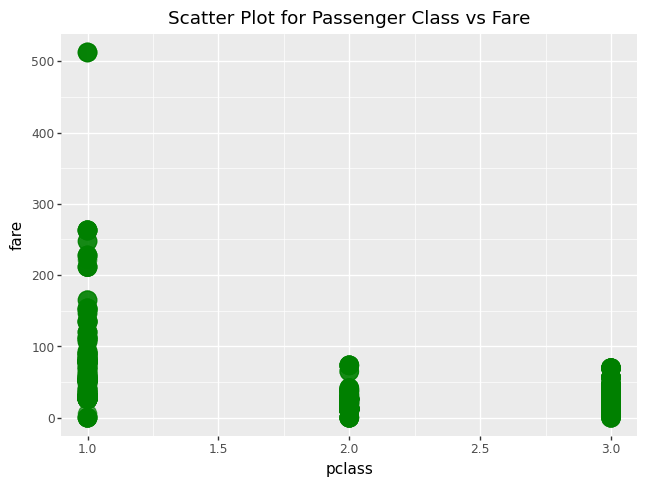

In [54]:
scatter_plot = ggplot(data=df,mapping=aes(x='pclass',y='fare'))

(scatter_plot +
 plotnine.labs(title="Scatter Plot Passenger Class vs Fare"))

(scatter_plot +
 plotnine.labs(title="Scatter Plot for Passenger Class vs Fare")+
 plotnine.geom_point(shape='o',size=7,color="green",alpha=0.7)).draw()

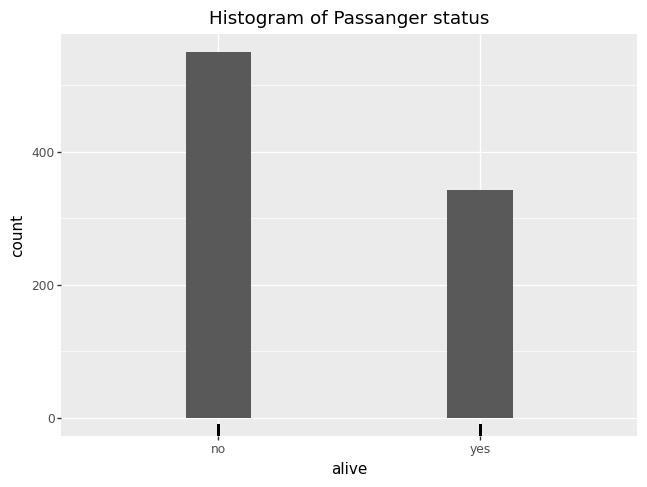

In [55]:
hist = ggplot(data=df,mapping=aes(x='alive'))

(hist +
 plotnine.labs(title="Histogram of Passanger status")+
 plotnine.geom_histogram()+
 plotnine.geom_rug()).draw()

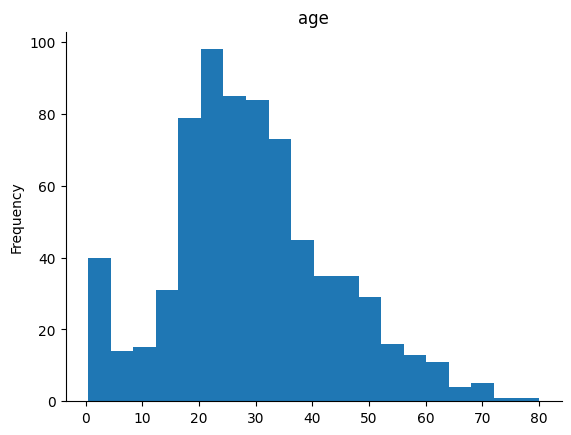

In [43]:
df['age'].plot(kind='hist', bins=20, title='age')
pyplot.gca().spines[['top', 'right',]].set_visible(False)

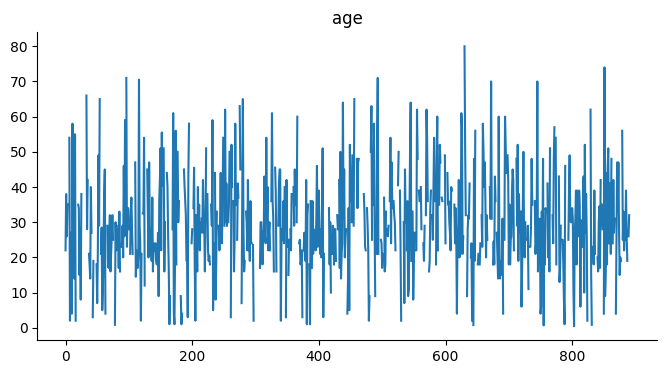

In [44]:
df['age'].plot(kind='line', figsize=(8, 4), title='age')
pyplot.gca().spines[['top', 'right']].set_visible(False)

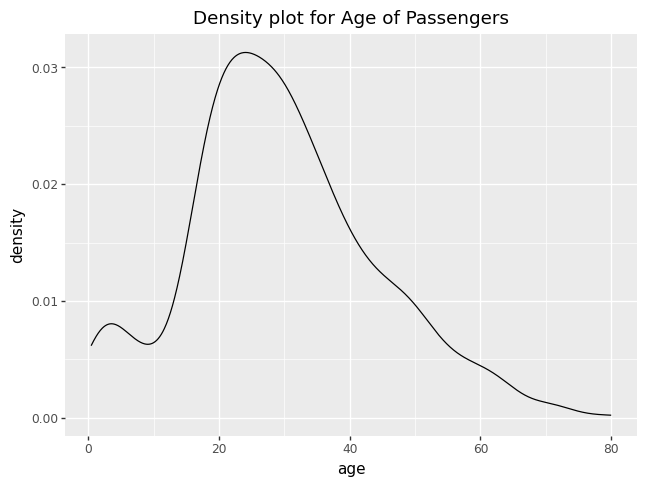

In [56]:
kde = ggplot(data=df,mapping=aes(x='age'))

(kde+
 plotnine.geom_density()+
 plotnine.labs(title="Density plot for Age of Passengers")).draw()

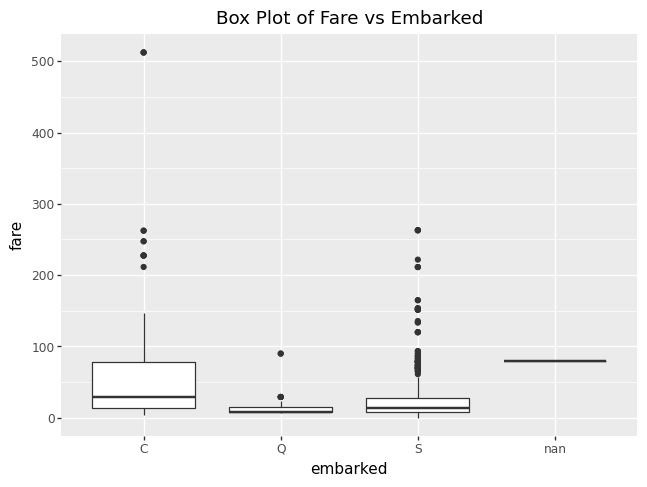

In [57]:
bp= ggplot(data=df,mapping=aes(x="embarked", y="fare"))

(bp+
 plotnine.geom_boxplot()+
 plotnine.labs(title="Box Plot of Fare vs Embarked")).draw()

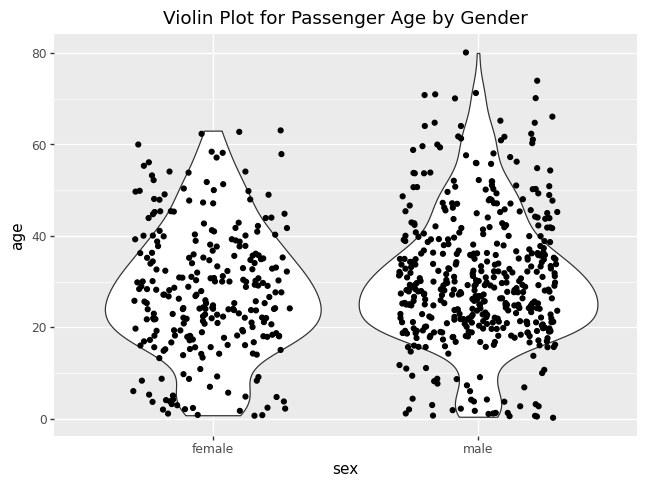

In [58]:
vp=ggplot(data=df,mapping=aes(x="sex", y="age"))

(vp+
 plotnine.geom_violin()+
 plotnine.labs(title="Violin Plot for Passenger Age by Gender")+
 plotnine.geom_jitter(position=plotnine.position_jitter(0.3))).draw()

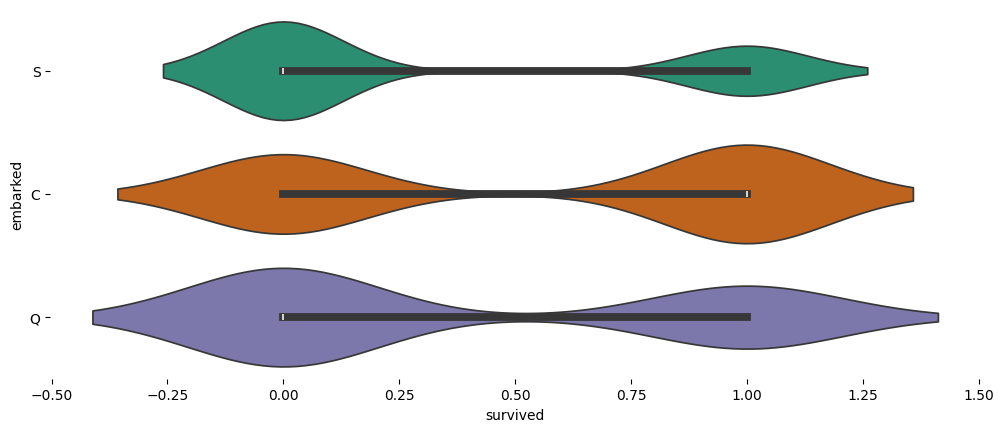

In [49]:
figsize = (12, 1.2 * len(df['embarked'].unique()))
pyplot.figure(figsize=figsize)
sns.violinplot(df, x='survived', y='embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

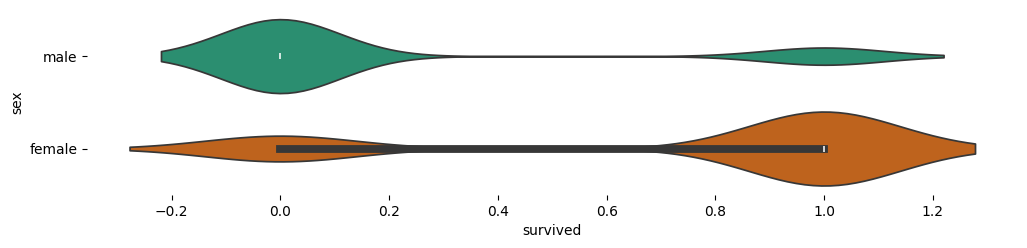

In [48]:
figsize = (12, 1.2 * len(df['sex'].unique()))
pyplot.figure(figsize=figsize)
sns.violinplot(df, x='survived', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

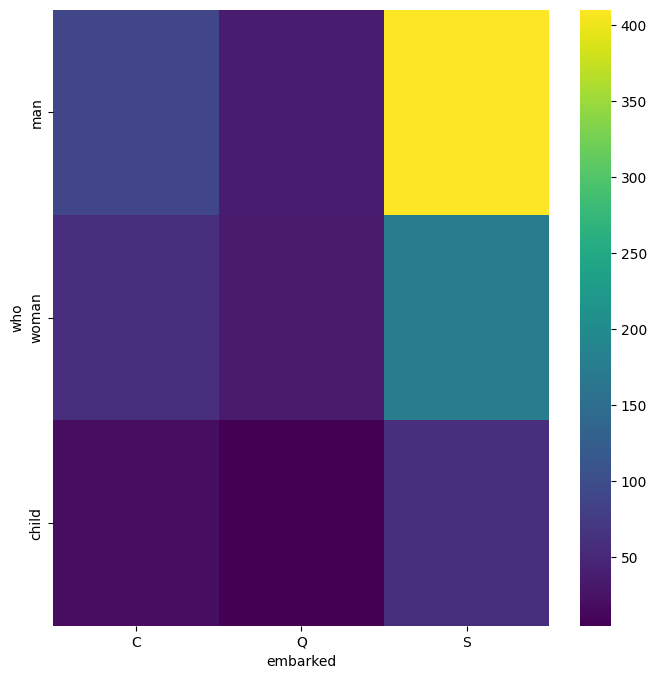

In [47]:
pyplot.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['who'].value_counts()
    for x_label, grp in df.groupby('embarked')
})
sns.heatmap(df_2dhist, cmap='viridis')
pyplot.xlabel('embarked')
_ = pyplot.ylabel('who')

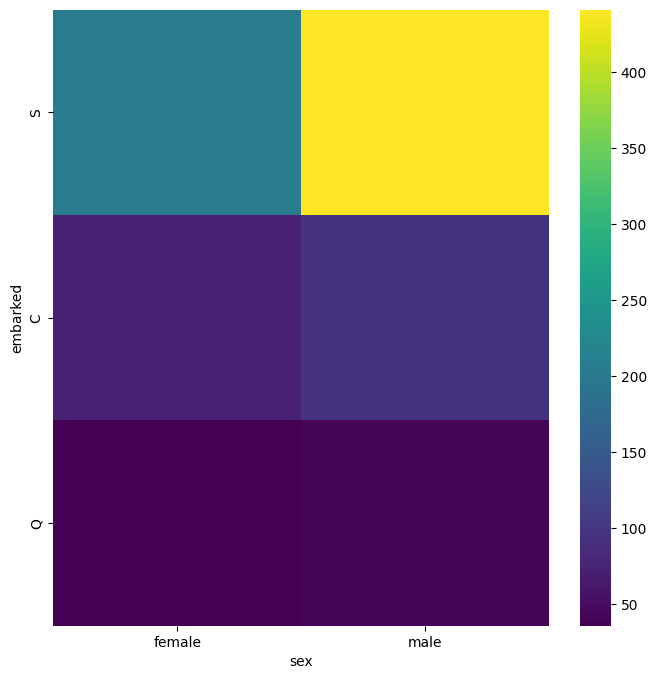

In [45]:
pyplot.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['embarked'].value_counts()
    for x_label, grp in df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
pyplot.xlabel('sex')
_ = pyplot.ylabel('embarked')